# Project: Pytorch

**Instructions for Students:**

Please carefully follow these steps to complete and submit your project:

1. **Completing the Project**: You are required to work on and complete all tasks in the provided project. Be disciplined and ensure that you thoroughly engage with each task.
   
2. **Creating a Google Drive Folder**: Each of you must create a new folder on your Google Drive if you haven't already. This will be the repository for all your completed assignment and project files, aiding you in keeping your work organized and accessible.
   
3. **Uploading Completed Project**: Upon completion of your project, make sure to upload all necessary files, involving codes, reports, and related documents into the created Google Drive folder. Save this link in the 'Student Identity' section and also provide it as the last parameter in the `submit` function that has been provided.
   
4. **Sharing Folder Link**: You're required to share the link to your project Google Drive folder. This is crucial for the submission and evaluation of your project.
   
5. **Setting Permission toPublic**: Please make sure your Google Drive folder is set to public. This allows your instructor to access your solutions and assess your work correctly.

Adhering to these procedures will facilitate a smooth project evaluation process for you and the reviewers.

## Student Identity

In [91]:
# # @title #### Student Identity
student_id = "REA29FYX" # @param {type:"string"}
name = "Muhammad Firdho Kustiawan" # @param {type:"string"}
drive_link = "https://drive.google.com/drive/folders/1MyWEwkHcHLlTTq0Oq0VbtojFDum73a35?usp=sharing"  # @param {type:"string"}

assignment_id = "00_pytorch_project"

# Import grader package
!pip install rggrader
from rggrader import submit, submit_image

## Project Description

In this project, you will use what you learn to create your own Deep Learning model. We'll use a variety of datasets, each with different data types such as images, text, and numerical/categorical data. Your task is to choose one of these datasets and build a deep learning model upon it.


## Datasets

Choose one from the following datasets for your project:

1. **Digits Dataset**: A simplified version of MNIST containing 8x8 images of hand-written digits. [Dataset Link](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)
2. **Dogs vs. Cats Dataset from Kaggle**: A sizable dataset of 25,000 images with equal representation of dogs and cats. [Dataset Link](https://www.kaggle.com/c/dogs-vs-cats)
3. **Breast Cancer Wisconsin (Diagnostic) Dataset**: Computed features from a digitized image of a fine needle aspirate (FNA) of a breast mass. [Dataset Link](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)
4. **Spam Text Message Classification Dataset**: A collection of labeled SMS messages, categorized as "spam" or "ham". [Dataset Link](https://www.kaggle.com/uciml/sms-spam-collection-dataset)
5. **German Credit Risk Dataset**: People's data categorized by various attributes to predict credit risk. [Dataset Link](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29)



## Grading Scheme

Your work will be evaluated based on both accuracy and loss value:

100: The model has an accuracy of more than 80% and a Loss Value of less than 0.2. This model is excellent and demonstrates a strong understanding of the task.

90: The model has an accuracy between 70% - 79% and a Loss Value between 0.2 - 0.3. This model is very good, with some room for improvement.

80: The model has an accuracy between 60% - 69% and a Loss Value between 0.3 - 0.4. This model is fairly good but needs improvement in balancing accuracy and loss value.

70: The model has an accuracy between 50% - 59% and a Loss Value between 0.4 - 0.5. This model is below average and needs significant improvement.

60 or below: The model has an accuracy of less than 50% or a Loss Value of more than 0.5, or the student did not submit the accuracy and Loss Value. This model is poor and needs considerable improvement.

Rmember to make a copy of this notebook in your Google Drive and work in your own copy.

Let's start your deep learning journey! Choose your dataset and delve into the project! Happy modeling!

## Project Structure

Your project should be organized into five main sections.

### 1. Package and Module Installation

First, let's pool all package and module that you'll need in the installation section below.

In [1]:
# Write any package/module installation that you need
# pip install goes here, this helps declutter your output below

!pip -q install numpy requests nlpaug
!pip -q install torch
!pip -q install transformers
!pip -q install sentencepiece
!pip -q install gensim
!pip -q install -U portalocker>=2.0.0`

/bin/bash: -c: line 1: unexpected EOF while looking for matching ``'
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import torch
import nltk
import json
import re

from torch import nn
from itertools import islice
from collections import Counter
from wordcloud import WordCloud
from torchtext import data
from nltk.corpus import stopwords
from torch.utils.data import DataLoader
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from torchtext.data.utils import get_tokenizer
from nlpaug.util.file.download import DownloadUtil
from torchtext.vocab import build_vocab_from_iterator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# DownloadUtil.download_word2vec(dest_dir='.')

Downloading...
From (original): https://drive.google.com/uc?export=download&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
From (redirected): https://drive.google.com/uc?export=download&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&confirm=t&uuid=3a40bd01-b034-466f-b00e-fb766da85afc
To: /content/GoogleNews-vectors-negative300.bin.gz
100%|██████████| 1.65G/1.65G [00:17<00:00, 95.9MB/s]


In [ ]:
import nlpaug.augmenter.word as naw

In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
plt.style.use('seaborn-v0_8')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2. Data Loading and Preprocessing

Load the chosen dataset and preprocess it for deep learning.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 🎯 **Step 1: Load dataset**
---

#### ✨ 1.1 Dataset spam

In [ ]:
path =  '/content/drive/MyDrive/SKILL ACADEMY/PROJECT 4/Dataset/spam.csv'

df_spam = pd.read_csv(path, encoding = 'latin-1')

df_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


🚧 Berdasarkan informasi step 1 ini diketahui bahwasanya sebagai berikut:
- Terdapat slang word, seperti 'u' seharusnya you
- Terdapat 3 kolom unnamed yang datanya 5 teratas seperti di atas berisi NaN
- Terdapat variasi penggunaan huruf kapital dan huruf kecil

#### ✨ 1.2 Dataset slang words

🔎 Dataset slang ini saya ambil dari internet dan saya tambahkan sendiri berdasarkan pemahaman saya

In [ ]:

def load_json(file_path):

    with open(file_path, 'r', encoding='utf-8') as json_file:

        data = json.load(json_file)

    return data


def print_data(data):

  for key, value in islice(data.items(), 5):

    print(key, value)

In [ ]:
path = '/content/drive/MyDrive/SKILL ACADEMY/PROJECT 4/Dataset/slang.json'

slang_words = load_json(path)

print_data(slang_words)

bbc british broadcasting corporation
bbb bugging beyond belief
bbe babe
glotr good luck on the rebuild
twss that's what she said


### 🎯 **Step 2: Check column and row totals**

---

In [ ]:
print('Rows total: ', df_spam.shape[0])

print('Columns total: ', df_spam.shape[1])

Rows total:  5572
Columns total:  5


🚧 Dari hasil di atas, rows total hanya mempresentasikan jumlah total data yang dimiliki oleh suatu kolom yang memiliki total data terbanyak bukan keseluruhan kolom sehingga pada step 3, saya akan menampilkan ringkasan struktur dataframe-nya

### 🎯 **Step 3: Check data info**
---

In [ ]:
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


🚧 Dari hasil di atas dapat diketahui beberapa hal sebagai berikut:
1. Berdasarkan step 1 dan step 3, diketahui bahwasanya kolom v1 sebagai label dan kolom v2 sebagai data teksnya.
2. Kolom Unnamed: 2 hingga 4 perlu dilakukan analisis lebih lanjut
2. Jumlah data pada kolom v1 dan kolom v2 ialah sama, maka dapat disimpulkan tidak terdapat null values pada kedua kolom tersebut.

### 🎯 **Step 4: Check null values**
---

🔎 Dari hasil step 3, saya melakukan analisis lebih lanjut pada kolom Unnamed dengan melakukan pengecekan null values terlebih dahulu. Ini karena pada step 1, lima data teratas yang ditampilkan oleh kolom tersebut mengandung nilai NaN.

In [ ]:
def detect_null_values(data):
    null_column = data.columns[data.isnull().any()]

    head_column = ["Column name", "Total nulls", "Total nulls (%)", "Data type"]

    null_info = pd.DataFrame(columns=head_column)

    for column in null_column:

        total_null = data[column].isnull().sum()

        total_null_percent = (total_null / len(data)) * 100

        data_type = data[column].dtype

        null_info = pd.concat([null_info, pd.DataFrame([[column, total_null, total_null_percent, data_type]], columns=head_column)],  ignore_index=True)

    return null_info

null_info = detect_null_values(df_spam)

null_info

,Column name,Total nulls,Total nulls (%),Data type
0,Unnamed: 2,5522,99.102656,object
1,Unnamed: 3,5560,99.784637,object
2,Unnamed: 4,5566,99.892319,object


🚧 Dari hasil output di atas, terlihat bahwa 99% ketiga kolom tersebut datanya bernilai null atau NaN

### 🎯 **Step 5: Data cleaning 1**
---

🔎 Berdasarkan step 3 hingga 4, saya akan mengambil hanya kolom "v1" dan "v2" dari DataFrame dan menyimpannya pada variabel baru. Dengan demikian, data asli yang memuat kolom-kolom selain kedua kolom tersebut tetap tersedia.

#### ✨ 5.1 Feature selection

In [ ]:
df_spam_new = df_spam[['v1', 'v2']]

df_spam_new.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### ✨ 5.2 Rename column v1 and column v2

In [ ]:
df_spam_new.rename(columns={'v1': 'Label', 'v2': 'Data'}, inplace=True)

df_spam_new.head()

<ipython-input-15-b21225bf88e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam_new.rename(columns={'v1': 'Label', 'v2': 'Data'}, inplace=True)


,Label,Data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 🎯 **Step 6: Compare the distribution of the "Label" column.**

---



In [ ]:
spam_counts = df_spam_new['Label'].value_counts(ascending=True)

spam_counts

spam     747
ham     4825
Name: Label, dtype: int64

<ipython-input-17-3c023639ba2f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=spam_counts.index, y=spam_counts.values, palette='magma')


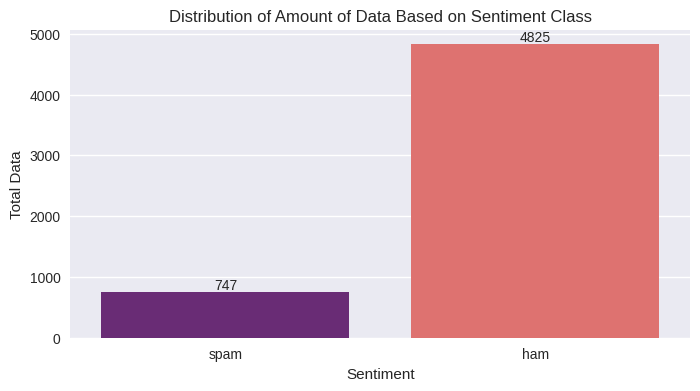

In [ ]:
plt.figure(figsize=(8, 4))

ax = sns.barplot(x=spam_counts.index, y=spam_counts.values, palette='magma')

for p in ax.containers:
  ax.bar_label(p,)

plt.xlabel('Sentiment')

plt.ylabel('Total Data')

plt.title('Distribution of Amount of Data Based on Sentiment Class')

plt.show()

🚧 Berdasarkan grafik di atas dapat diketahui bahwa sebaran data dari label tidak seimbang sehingga harus dilakukan data balancing.

### 🎯 **Step 7: Exploratory Data Analysis before preprocessing**

---



🔎 Tahap 5 ini, saya mengecek panjang tweet tiap kelas dengan cara membagi teks berdasarkan spasi dan hasilnya dimasukkan pada kolom baru yaitu tweet_length (feature engineering) sesuai data masing-masing

#### ✨ 7.1 - Check text length

##### 📫 7.1.1 - Barplot

In [ ]:
df_spam_new['text_length'] = df_spam_new['Data'].str.split(' ').apply(len)

<ipython-input-18-ba42a4537eb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam_new['text_length'] = df_spam_new['Data'].str.split(' ').apply(len)


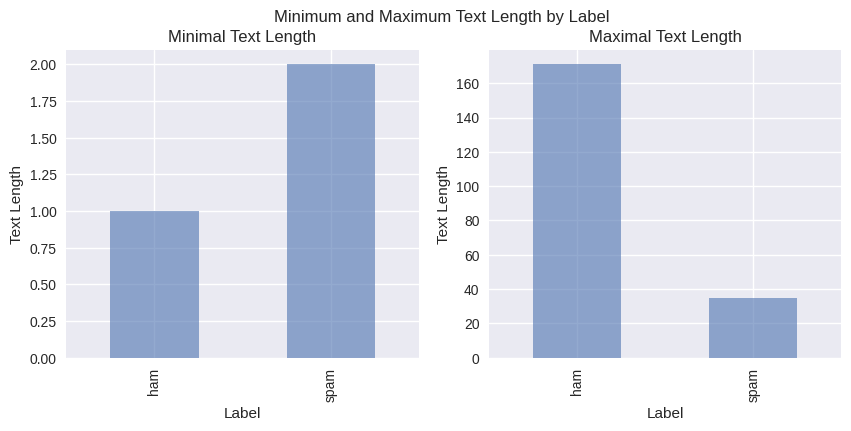

In [ ]:
def plot_text_length(df, column):

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    fig.suptitle('Minimum and Maximum Text Length by Label')

    df.groupby('Label')[column].min().plot(kind='bar', ax=axes[0], alpha=0.6)
    axes[0].set_title('Minimal Text Length')
    axes[0].set_ylabel('Text Length')

    df.groupby('Label')[column].max().plot(kind='bar', ax=axes[1], alpha=0.6)
    axes[1].set_title('Maximal Text Length')
    axes[1].set_ylabel('Text Length')

    plt.show()

plot_text_length(df_spam_new, 'text_length')

🚧 Berdasarkan keterangan pada grafik 7.1 dapat dilihat sebagai berikut:

- Kelas yang mempunyai tweet terpendek adalah kelas ham dengan jumlah kata sekitar 1 kata
- Kelas yang mempunyai tweet terpanjang adalah kelas ham

##### 📫 7.1.2 - Boxplot

In [ ]:

distribution = df_spam_new[['Label', 'text_length']]

<ipython-input-21-c6d8526cdc3c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Label', y='text_length', data=distribution, palette='rocket')


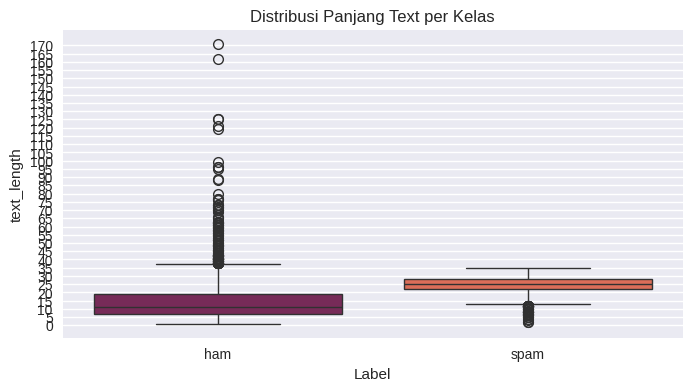

In [ ]:
plt.figure(figsize=(8, 4))

ax = sns.boxplot(x='Label', y='text_length', data=distribution, palette='rocket')

plt.title('Distribusi Panjang Text per Kelas')

plt.yticks(range(0, max(df_spam_new['text_length']) + 1, 5))

plt.show()


🚧 Berdasarkan keterangan pada grafik 7.2 dapat dilihat sebagai berikut:
- Pada kelas ham rata-rata panjang teks sekitar 11 kata
- Pada kelas spam rata-rata panjang tweet berkisar 25 kata

Jadi kelas yang mempunyai rata-rata panjang tweet terpanjang adalah kelas spam
Kemudian data outlier pada gambar di atas hanya menggambarkan panjang tweet dan tidak akan saya gunakan untuk train sehingga bisa dibiarkan saja

#### ✨ **7.2: Check the words unigram, bigram, trigrams that often appear**

---


🔎 Pada tahap ini saya menggunakan perpustakaan `CountVectorizer` dari Sklearn untuk menghitung frekuensi kemunculan kata dari unigram, bigram, dan trigram. Lalu saya filter untuk menampilkan 7 kata teratas yang paling banyak kemunculannya

In [ ]:
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):

    vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range)

    X = vectorizer.fit_transform(corpus)

    words = vectorizer.get_feature_names_out()

    freqs = X.sum(axis=0).A1

    df = pd.DataFrame({'Word': words, 'Frequency': freqs})

    df = df.sort_values(by='Frequency', ascending=False).head(n).reset_index(drop=True)

    return df

def plot_to_graph(plot_data):

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    axes[1, 1].axis('off')

    for i, plot_info in enumerate(plot_data):

        row = i // 2

        col = i % 2

        ax = axes[row, col]

        sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)

        for p in ax.patches:
            ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + 0.5), ha='right', va='center', color='white')

        ax.set_title(plot_info['title'])

    plt.tight_layout()

    plt.show()

In [ ]:
df__spam = df_spam_new[df_spam_new['Label'] == 'spam']

df__ham = df_spam_new[df_spam_new['Label'] == 'ham']

##### 📫 7.2.1 - Unigram

In [ ]:
stop_words = None

n = 7

unigram_all = get_top_ngrams(df_spam_new['Data'], (1, 1), stop_words, n)

unigram_spam = get_top_ngrams(df__spam['Data'], (1, 1), stop_words, n)

unigram_ham = get_top_ngrams(df__ham['Data'], (1, 1), stop_words, n)

unigram_all.head()


,Word,Frequency
0,to,2242
1,you,2240
2,the,1328
3,and,979
4,in,898


<ipython-input-22-fdf213bccfac>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-22-fdf213bccfac>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-22-fdf213bccfac>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)


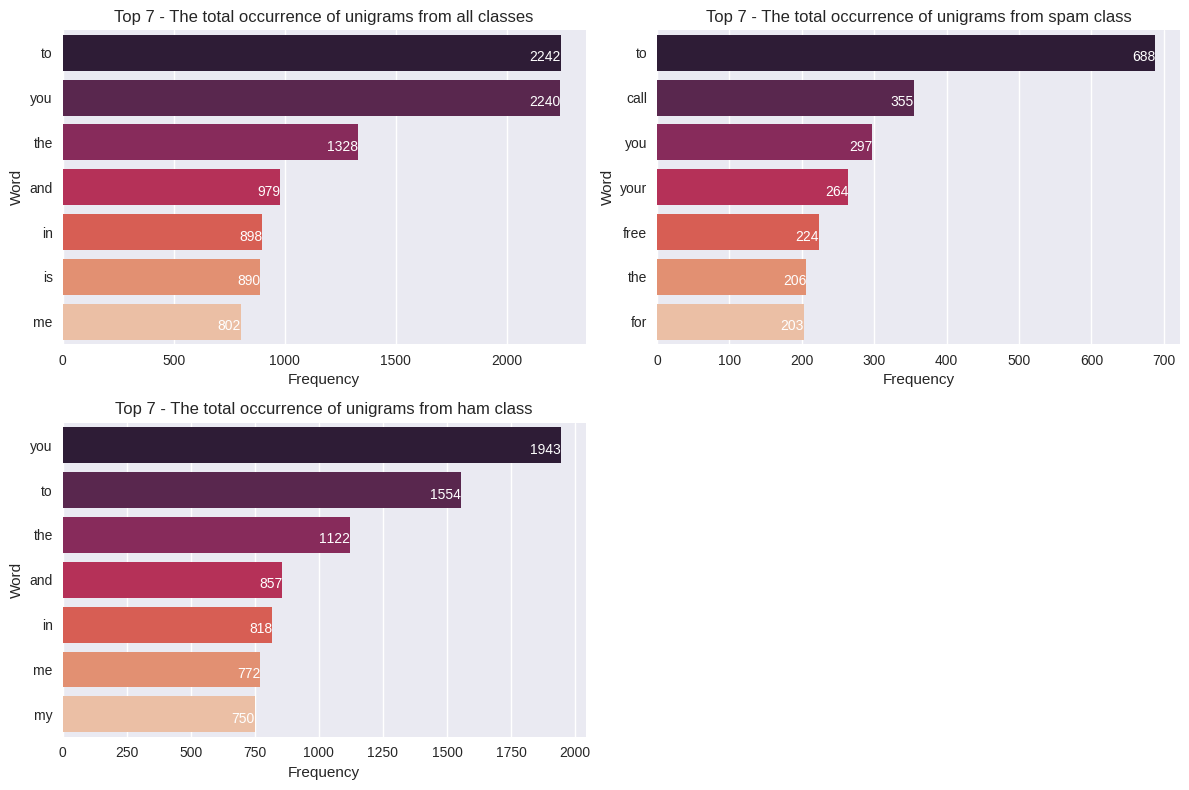

In [ ]:
plot_data = [

    {'data': unigram_all, 'title': 'Top 7 - The total occurrence of unigrams from all classes'},

    {'data': unigram_spam, 'title': 'Top 7 - The total occurrence of unigrams from spam class'},

    {'data': unigram_ham, 'title': 'Top 7 - The total occurrence of unigrams from ham class'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya unigram 'to' berada pada posisi 1 pada kategori all class dan spam class, tetapi berada di posisi ke 2 pada kategori ham class

##### 📫 7.2.2 - Bigram

In [ ]:
bigram_all = get_top_ngrams(df_spam_new['Data'], (2, 2), stop_words, n)

bigram_spam = get_top_ngrams(df__spam['Data'], (2, 2), stop_words, n)

bigram_ham = get_top_ngrams(df__ham['Data'], (2, 2), stop_words, n)

<ipython-input-22-fdf213bccfac>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-22-fdf213bccfac>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-22-fdf213bccfac>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)


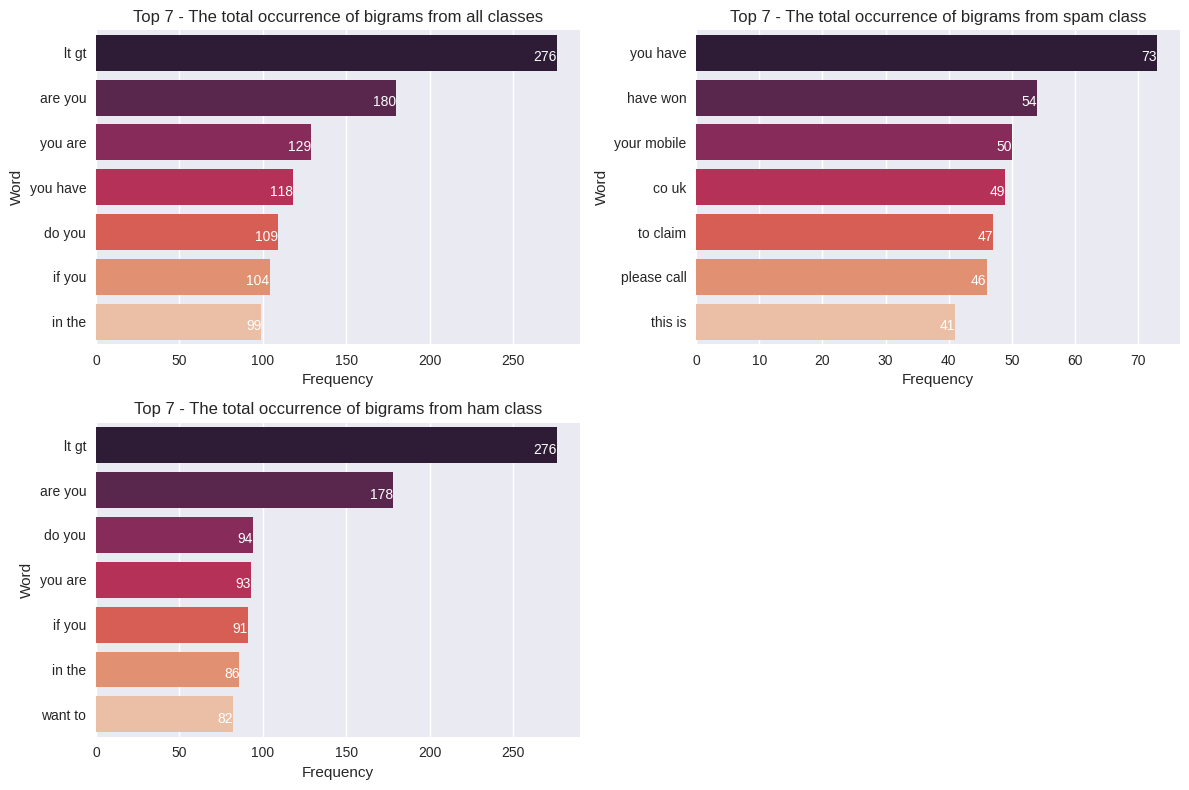

In [ ]:
plot_data = [

    {'data': bigram_all, 'title': 'Top 7 - The total occurrence of bigrams from all classes'},

    {'data': bigram_spam, 'title': 'Top 7 - The total occurrence of bigrams from spam class'},

    {'data': bigram_ham, 'title': 'Top 7 - The total occurrence of bigrams from ham class'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya bigram 'It gt' berada pada posisi 1 pada kategori all class dan ham class

##### 📫 7.2.3 - Trigram

In [ ]:
trigram_all = get_top_ngrams(df_spam_new['Data'], (3, 3), stop_words, n)

trigram_spam = get_top_ngrams(df__spam['Data'], (3, 3), stop_words, n)

trigram_ham = get_top_ngrams(df__ham['Data'], (3, 3), stop_words, n)

<ipython-input-22-fdf213bccfac>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-22-fdf213bccfac>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-22-fdf213bccfac>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)


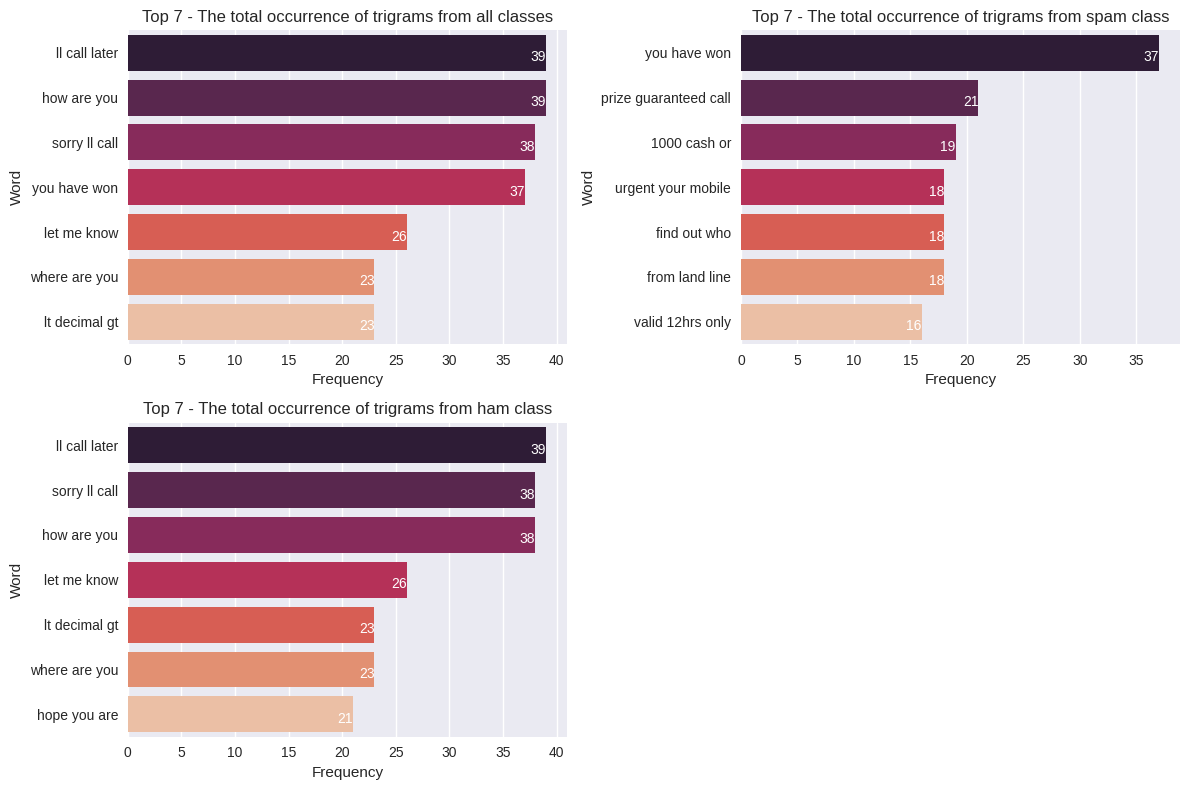

In [ ]:
plot_data = [

    {'data': trigram_all, 'title': 'Top 7 - The total occurrence of trigrams from all classes'},

    {'data': trigram_spam, 'title': 'Top 7 - The total occurrence of trigrams from spam class'},

    {'data': trigram_ham, 'title': 'Top 7 - The total occurrence of trigrams from ham class'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya trigram 'Il call later' berada pada posisi 1 pada kategori all class dan ham class

#### ✨ **7.3: Check the wordcloud**

---


In [ ]:
def create_wordcloud(palette, data_target):

    label_data = ' '.join(data_target)

    wordcloud = WordCloud(background_color='black', colormap=palette, collocations=False).generate(label_data)

    return wordcloud

def plot_wordcloud(plot_data):

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))

    axes[1, 1].axis('off')

    for i, plot_info in enumerate(plot_data):

        row = i // 2

        col = i % 2

        ax = axes[row, col]

        ax.imshow(plot_info['data'], interpolation='bilinear')

        ax.axis("off")

        ax.set_title(plot_info['title'], fontsize=28)

    plt.tight_layout()

    plt.show()

In [ ]:
wordcloud_all = create_wordcloud('rocket', df_spam_new['Data'])

wordcloud_spam = create_wordcloud('Greens', df__spam['Data'])

wordcloud_ham = create_wordcloud('Blues', df__ham['Data'])

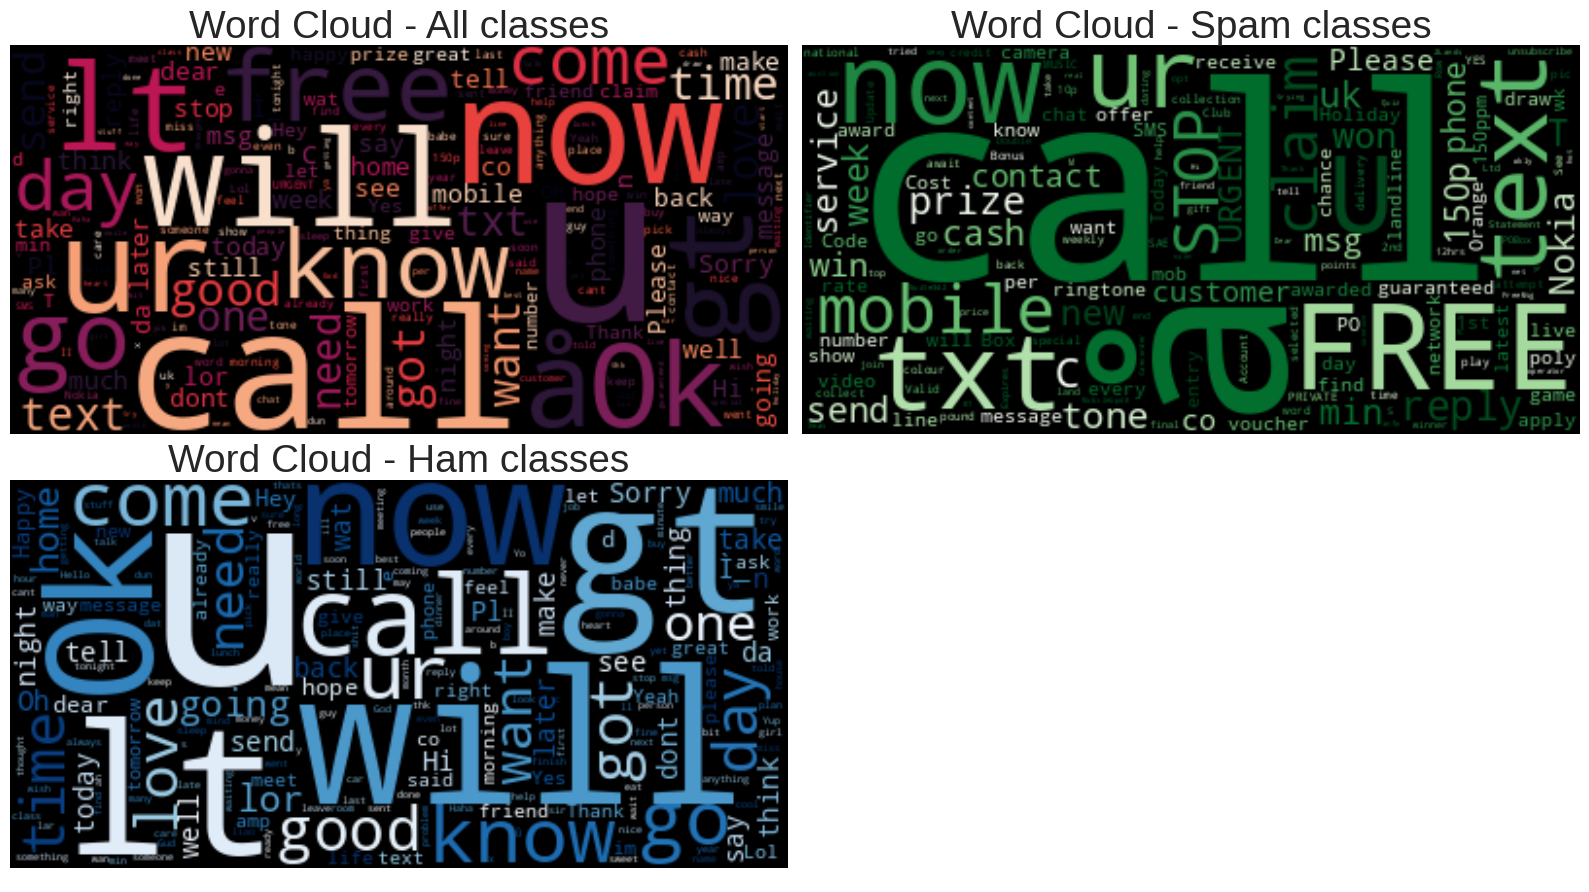

In [ ]:
plot_data = [

    {'data': wordcloud_all , 'title': 'Word Cloud - All classes'},

    {'data': wordcloud_spam, 'title': 'Word Cloud - Spam classes'},

    {'data': wordcloud_ham, 'title': 'Word Cloud - Ham classes'}
]

plot_wordcloud(plot_data)

🚧 Berdasarkan step 8.1 dan step 9 terdapat perbedaan perihal kata-kata yang paling banyak muncul seperti berikut

| Class | CountVectorizer           | WordCloud   |
|-------|---------------------------|-------------|
| All   | to        		    | U           |
| Spam  | to                        | Call        |
| Ham   | You                       | U           |

Hal ini biasanya umum terjadi karena perbedaan logic yang dipakai dari kedua library tersebut. Perbedaan jumlah kata paling banyak muncul dari  `CountVectorizer` atau `Wordcloud` sebenarnya bisa dimaklumi karena hanya memberikan informasi apakah suatu kata merepresentasikan suatu label data atau tidak.


- https://www.kaggle.com/code/djrango/spam-detection-classsifier-lstm-99-accuracy
- https://www.kaggle.com/code/brmil07/sms-spam-classification-with-nlp#Feature-Engineering
- https://www.kaggle.com/code/yizhongchao/bert-prompt-for-spam-classification-acc-0-9937

### 🎯 **Step 8: Preprocessing data spam**

---


🔎 Berdasarkan informasi yang telah saya dapat pada step-step sebelumnya, saya berencana melakukan preprocessing berupa berikut:
- Mengubah semua kalimat menjadi huruf kecil
- Membersihkan data teksnya dengan menghapus mentions, hashtag, angka, dll
- Melakukan tokenize pada data
- Menghapus stopword
- Melakukan lemmatize

In [ ]:
def filtering_slang(text):
    text = text.replace('(',' ')
    text = text.replace(')',' ')
    words = text.split()

    for i, word in enumerate(words):
        if word.lower() in slang_words.keys():

            if '|' in slang_words[word.lower()]:
                words[i] = slang_words[word.lower()].split('|')[0]
            elif '/' in slang_words[word.lower()]:
                words[i] = slang_words[word.lower()].split('/')[0]
            else:
                words[i] = slang_words[word.lower()]

    filtered_text = ' '.join(words)

    return filtered_text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r"www\S+", '', text) # remove link
    text = re.sub(r'\b(?:\d{1,2}(?:st|nd|rd|th))\b', '', text)
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'\.+', ' ', text)
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    text = text.replace('\n', ' ') # replace new line into space
    text = text.replace("'", "") # replace single quotes
    text = text.replace(',','') # replace commas
    text = text.replace(']','') # replace closing brackets
    text = text.replace('[','') # # replace opening brackets
    text = text.replace('&lt;#&gt;', '')
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('english'))

    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)

    text = filtered
    return text

def lemmatizeText(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = []

    for word in text:
        if word.lower() != 'sms':
            # Melakukan lemmatization pada kata-kata lain
            lemmatized_text.append(lemmatizer.lemmatize(word))

    return lemmatized_text

#### ✨ 8.1 - Replacing slang words

In [ ]:
df_spam_new['clean'] = df_spam_new['Data'].apply(filtering_slang)

df_spam_new.head()

,Label,Data,text_length,clean,clean_sentence,clean_sentence_length
0,ham,"Go until jurong point, crazy.. Available only ...",20,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis great wo...,16
1,ham,Ok lar... Joking wif u oni...,6,only kidding lar... Joking with you oni...,kidding lar joking oni,4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,Free entry in to a weekly competition to win f...,free entry weekly competition win football ass...,24
3,ham,U dun say so early hor... U c already then say...,11,you do not say so early hor... you see already...,say early hor see already say,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,"no I do not think he goes to usf, he lives aro...",think go usf life around though,6


#### ✨ 8.2 - Change to lowercase

In [ ]:
df_spam_new['clean'] = df_spam_new['clean'].apply(casefoldingText)

df_spam_new.head()

,Label,Data,text_length,clean,clean_sentence,clean_sentence_length
0,ham,"Go until jurong point, crazy.. Available only ...",20,"go until jurong point, crazy.. available only ...",go jurong point crazy available bugis great wo...,16
1,ham,Ok lar... Joking wif u oni...,6,only kidding lar... joking with you oni...,kidding lar joking oni,4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry in to a weekly competition to win f...,free entry weekly competition win football ass...,24
3,ham,U dun say so early hor... U c already then say...,11,you do not say so early hor... you see already...,say early hor see already say,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,"no i do not think he goes to usf, he lives aro...",think go usf life around though,6


#### ✨ 8.3 - Clean up text

🔎 Pada tahap ini saya menghapus beberapa hal sebagai berikut:

- Mentions (contoh: @username)
- Hashtags (contoh: #example123)
- Hyperlinks (contoh: http://example.com)
- Numbers (contoh: 12345)
- Multiple dots (diganti dengan spasi)
- Newline (diganti dengan spasi)
- Single quotes (dihapus)
- Commas (dihapus)
- Closing brackets (dihapus)
- Opening brackets (dihapus)
- Punctuation (dihapu)
- Leading and trailing spaces (dihapus)

In [ ]:
df_spam_new['clean'] = df_spam_new['clean'].apply(cleaningText)

df_spam_new.head()

,Label,Data,text_length,clean,clean_sentence,clean_sentence_length
0,ham,"Go until jurong point, crazy.. Available only ...",20,go until jurong point crazy available only in...,go jurong point crazy available bugis great wo...,16
1,ham,Ok lar... Joking wif u oni...,6,only kidding lar joking with you oni,kidding lar joking oni,4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry in to a weekly competition to win f...,free entry weekly competition win football ass...,24
3,ham,U dun say so early hor... U c already then say...,11,you do not say so early hor you see already t...,say early hor see already say,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,no i do not think he goes to usf he lives arou...,think go usf life around though,6


#### ✨ 8.4 - Breaks text into tokens

In [ ]:
df_spam_new['clean'] = df_spam_new['clean'].apply(tokenizingText)

df_spam_new.head()

,Label,Data,text_length,clean,clean_sentence,clean_sentence_length
0,ham,"Go until jurong point, crazy.. Available only ...",20,"[go, until, jurong, point, crazy, available, o...",go jurong point crazy available bugis great wo...,16
1,ham,Ok lar... Joking wif u oni...,6,"[only, kidding, lar, joking, with, you, oni]",kidding lar joking oni,4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,"[free, entry, in, to, a, weekly, competition, ...",free entry weekly competition win football ass...,24
3,ham,U dun say so early hor... U c already then say...,11,"[you, do, not, say, so, early, hor, you, see, ...",say early hor see already say,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,"[no, i, do, not, think, he, goes, to, usf, he,...",think go usf life around though,6


#### ✨ 8.5 - Remove stopwords

In [ ]:
df_spam_new['clean'] = df_spam_new['clean'].apply(filteringText)

df_spam_new.head()

,Label,Data,text_length,clean,clean_sentence,clean_sentence_length
0,ham,"Go until jurong point, crazy.. Available only ...",20,"[go, jurong, point, crazy, available, bugis, g...",go jurong point crazy available bugis great wo...,16
1,ham,Ok lar... Joking wif u oni...,6,"[kidding, lar, joking, oni]",kidding lar joking oni,4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,"[free, entry, weekly, competition, win, footba...",free entry weekly competition win football ass...,24
3,ham,U dun say so early hor... U c already then say...,11,"[say, early, hor, see, already, say]",say early hor see already say,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,"[think, goes, usf, lives, around, though]",think go usf life around though,6


#### ✨ 8.6 - Change the word to its base word

In [ ]:
df_spam_new['clean'] = df_spam_new['clean'].apply(lemmatizeText)

df_spam_new.head()

,Label,Data,text_length,clean,clean_sentence,clean_sentence_length
0,ham,"Go until jurong point, crazy.. Available only ...",20,"[go, jurong, point, crazy, available, bugis, g...",go jurong point crazy available bugis great wo...,16
1,ham,Ok lar... Joking wif u oni...,6,"[kidding, lar, joking, oni]",kidding lar joking oni,4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,"[free, entry, weekly, competition, win, footba...",free entry weekly competition win football ass...,24
3,ham,U dun say so early hor... U c already then say...,11,"[say, early, hor, see, already, say]",say early hor see already say,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,"[think, go, usf, life, around, though]",think go usf life around though,6


#### ✨ 8.7 - Recombine the tokenized words into sentences



🔎 Pada step ini saya menggabungkan token-token hasil dari step 8.4 - 8.6 untuk saya jadikan sebuah kalimat

In [ ]:
df_spam_new['clean_sentence']= [' '.join(tokens) for tokens in df_spam_new['clean']]

df_spam_new.head()

,Label,Data,text_length,clean,clean_sentence,clean_sentence_length
0,ham,"Go until jurong point, crazy.. Available only ...",20,"[go, jurong, point, crazy, available, bugis, g...",go jurong point crazy available bugis great wo...,16
1,ham,Ok lar... Joking wif u oni...,6,"[kidding, lar, joking, oni]",kidding lar joking oni,4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,"[free, entry, weekly, competition, win, footba...",free entry weekly competition win football ass...,24
3,ham,U dun say so early hor... U c already then say...,11,"[say, early, hor, see, already, say]",say early hor see already say,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,"[think, go, usf, life, around, though]",think go usf life around though,6


### 🎯 **Step 9: Exploratory Data Analysis after preprocessing**

---



🔎 Pada step ini saya melakukan EDA kembali untuk melihat perubahan setelah preprocessing

#### ✨ 9.1 - Check text length

##### 📫 9.1.1 - Barplot

In [ ]:
df_spam_new['clean_sentence_length'] = df_spam_new['clean_sentence'].str.split(' ').apply(len)

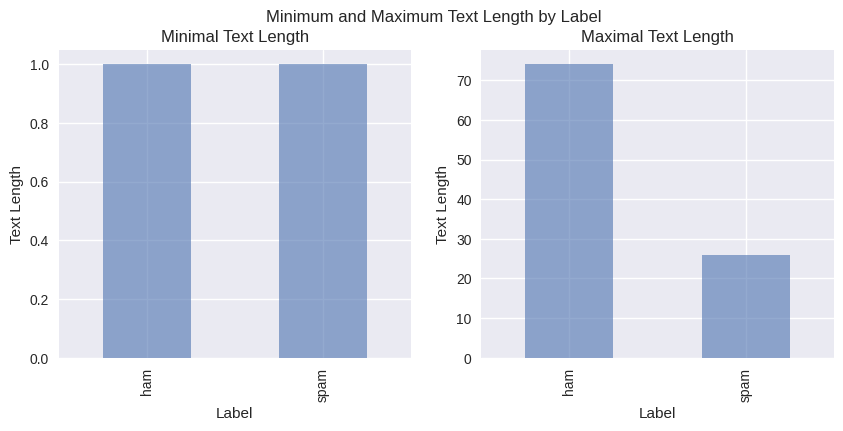

In [ ]:
plot_text_length(df_spam_new, 'clean_sentence_length')

🚧 Berdasarkan keterangan pada grafik 9.1.1 dapat dilihat sebagai berikut:

- Kelas yang mempunyai tweet terpendek adalah kelas ham dan spam sekitar 1 kata. Berbeda pada grafik 7.1.1, hanya kelas ham dengan jumlah kata sekitar 1 kata
- Kelas yang mempunyai tweet terpanjang masih sama dengan grafik 7.1.1 yaitu kelas ham

##### 📫 9.1.2 - Boxplot

In [ ]:
distribution = df_spam_new[['Label', 'clean_sentence_length']]

<ipython-input-125-74edcdb8fffd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Label', y='clean_sentence_length', data=distribution, palette='rocket')


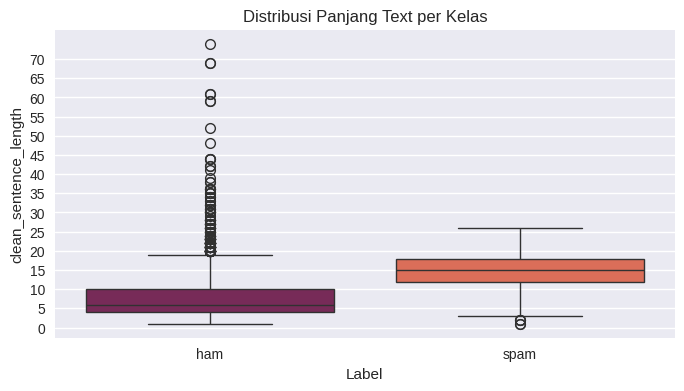

In [ ]:
plt.figure(figsize=(8, 4))

ax = sns.boxplot(x='Label', y='clean_sentence_length', data=distribution, palette='rocket')

plt.title('Distribusi Panjang Text per Kelas')

plt.yticks(range(0, max(df_spam_new['clean_sentence_length']) + 1, 5))

plt.show()


🚧 Berdasarkan keterangan pada grafik 9.1.2 dapat dilihat sebagai berikut:
- Pada kelas ham rata-rata panjang teks sekitar 6 kata dan berbeda dengan grafik 7.1.2 yang rata-ratanya 11 kata
- Pada kelas spam rata-rata panjang teksnya berkisar 16 kata dan berbeda pada grafik 7.1.2 yang 25 kata

Jadi kelas yang mempunyai rata-rata panjang tweet terpanjang ialah masih kelas spam.

#### ✨ **9.2: Check the words unigram, bigram, trigrams that often appear**

---


🔎 Pada tahap ini saya menggunakan perpustakaan `CountVectorizer` dari Sklearn untuk menghitung frekuensi kemunculan kata dari unigram, bigram, dan trigram. Lalu saya filter untuk menampilkan 7 kata teratas yang paling banyak kemunculannya

In [ ]:
df__spam = df_spam_new[df_spam_new['Label'] == 'spam']

df__ham = df_spam_new[df_spam_new['Label'] == 'ham']

##### 📫 9.2.1 - Unigram

In [ ]:
stop_words = None

n = 7

unigram_all = get_top_ngrams(df_spam_new['clean_sentence'], (1, 1), stop_words, n)

unigram_spam = get_top_ngrams(df__spam['clean_sentence'], (1, 1), stop_words, n)

unigram_ham = get_top_ngrams(df__ham['clean_sentence'], (1, 1), stop_words, n)

unigram_all.head()


,Word,Frequency
0,call,644
1,get,404
2,love,401
3,good,379
4,whatever,362


<ipython-input-22-fdf213bccfac>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-22-fdf213bccfac>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-22-fdf213bccfac>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)


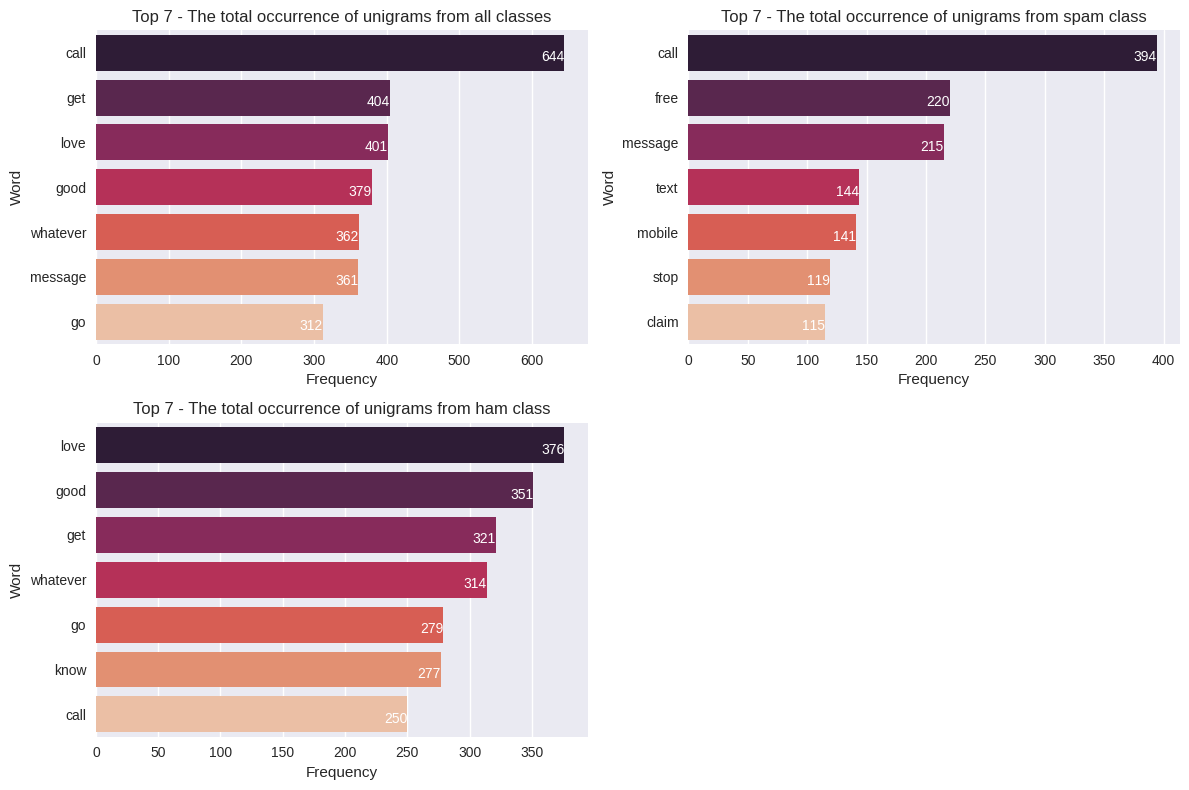

In [ ]:
plot_data = [

    {'data': unigram_all, 'title': 'Top 7 - The total occurrence of unigrams from all classes'},

    {'data': unigram_spam, 'title': 'Top 7 - The total occurrence of unigrams from spam class'},

    {'data': unigram_ham, 'title': 'Top 7 - The total occurrence of unigrams from ham class'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas, unigram 'call' ada di posisi 1 di all classes dan spam class. Hal ini berbeda pada grafik 7.2.1, di mana unigram 'to' berada pada posisi 1 pada kategori all class dan spam class, tetapi berada di posisi ke 2 pada kategori ham class

##### 📫 9.2.2 - Bigram

In [ ]:
bigram_all = get_top_ngrams(df_spam_new['clean_sentence'], (2, 2), stop_words, n)

bigram_spam = get_top_ngrams(df__spam['clean_sentence'], (2, 2), stop_words, n)

bigram_ham = get_top_ngrams(df__ham['clean_sentence'], (2, 2), stop_words, n)

<ipython-input-22-fdf213bccfac>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-22-fdf213bccfac>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-22-fdf213bccfac>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)


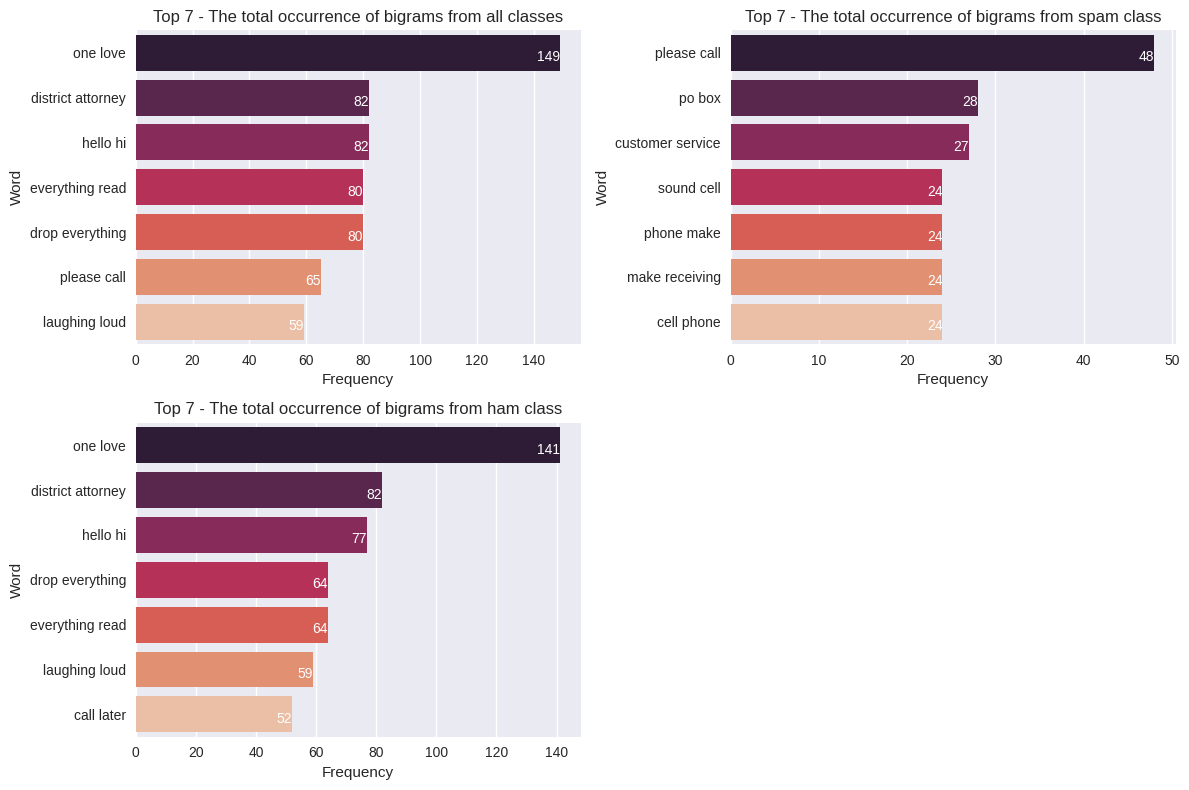

In [ ]:
plot_data = [

    {'data': bigram_all, 'title': 'Top 7 - The total occurrence of bigrams from all classes'},

    {'data': bigram_spam, 'title': 'Top 7 - The total occurrence of bigrams from spam class'},

    {'data': bigram_ham, 'title': 'Top 7 - The total occurrence of bigrams from ham class'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya bigram 'one love' menempati posisi 1 di all classes dan ham class. Hal ini berbeda pada 7.2.2, di mana bigram 'It gt' berada pada posisi 1 pada kategori all class dan ham class.

##### 📫 9.2.3 - Trigram

In [ ]:
trigram_all = get_top_ngrams(df_spam_new['clean_sentence'], (3, 3), stop_words, n)

trigram_spam = get_top_ngrams(df__spam['clean_sentence'], (3, 3), stop_words, n)

trigram_ham = get_top_ngrams(df__ham['clean_sentence'], (3, 3), stop_words, n)

<ipython-input-22-fdf213bccfac>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-22-fdf213bccfac>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-22-fdf213bccfac>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)


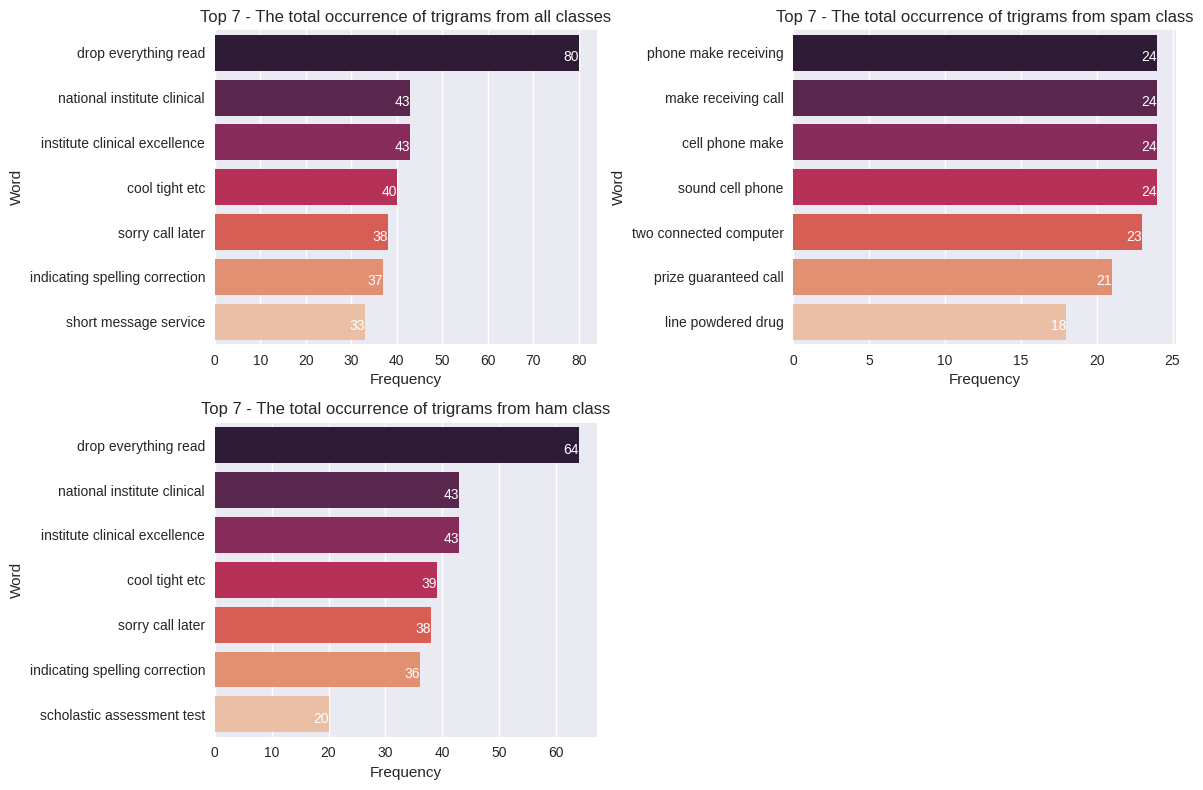

In [ ]:
plot_data = [

    {'data': trigram_all, 'title': 'Top 7 - The total occurrence of trigrams from all classes'},

    {'data': trigram_spam, 'title': 'Top 7 - The total occurrence of trigrams from spam class'},

    {'data': trigram_ham, 'title': 'Top 7 - The total occurrence of trigrams from ham class'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya posisi 1 di tempati oleh trigram 'drop everything read' pada all classes dan ham class. Ini berbeda dengan 7.2.3 di mana trigram 'Il call later' berada pada posisi 1 pada kategori all class dan ham class

#### ✨ **9.3: Check the wordcloud**

---


In [ ]:
wordcloud_all = create_wordcloud('rocket', df_spam_new['clean_sentence'])

wordcloud_spam = create_wordcloud('Greens', df__spam['clean_sentence'])

wordcloud_ham = create_wordcloud('Blues', df__ham['clean_sentence'])

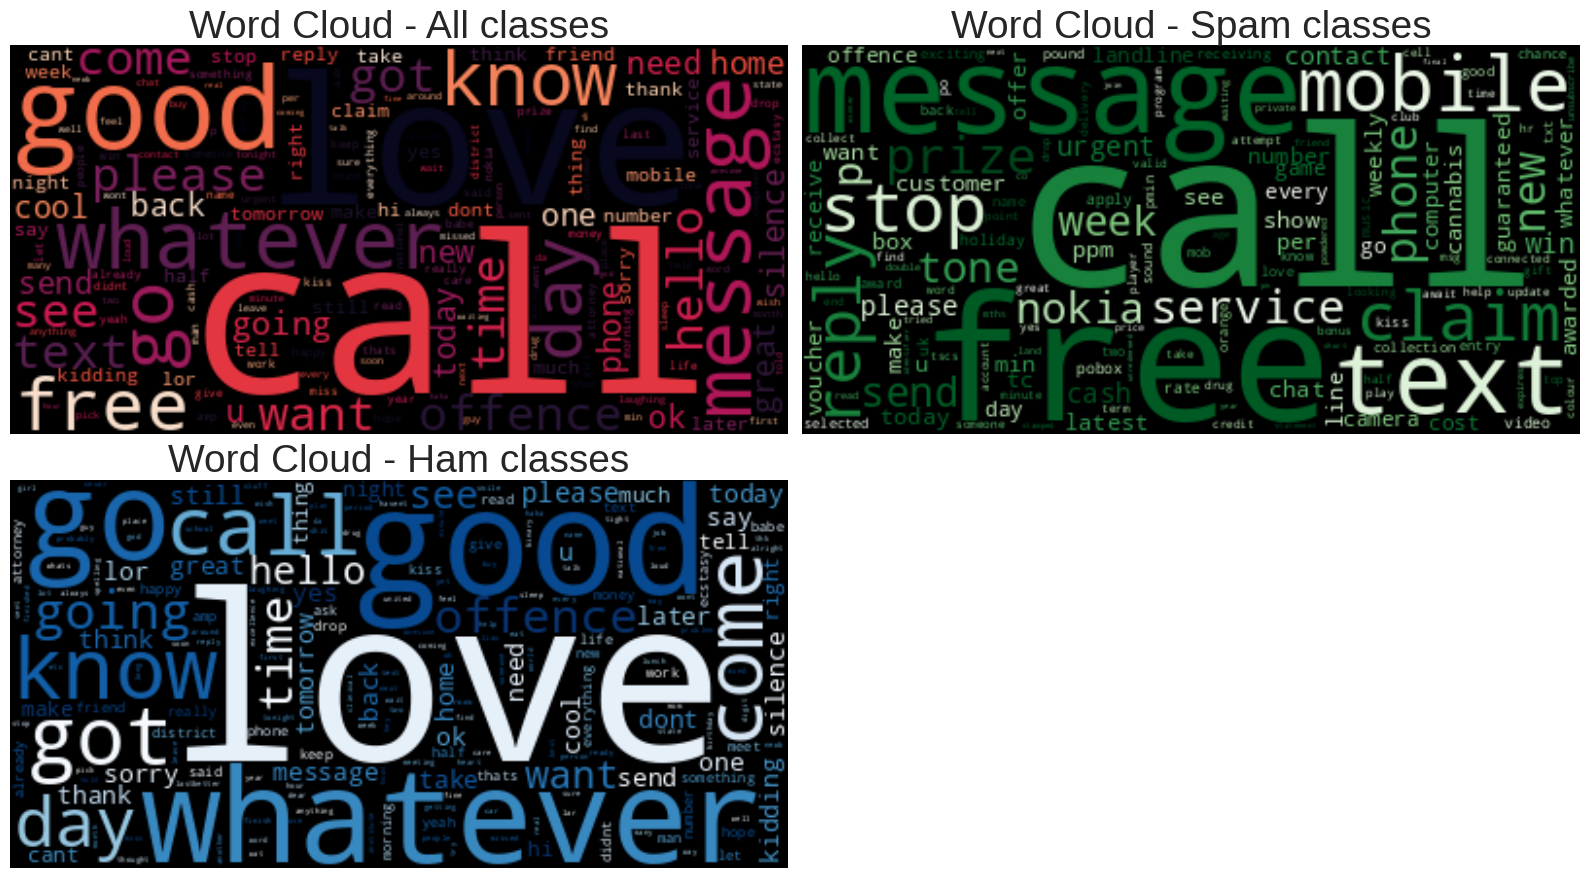

In [ ]:
plot_data = [

    {'data': wordcloud_all , 'title': 'Word Cloud - All classes'},

    {'data': wordcloud_spam, 'title': 'Word Cloud - Spam classes'},

    {'data': wordcloud_ham, 'title': 'Word Cloud - Ham classes'}
]

plot_wordcloud(plot_data)

🚧 Berdasarkan hasil di atas dapat dilihat bahwa kata yang paling banyak muncul sama dengan kata pada 9.2.1

### 🎯 **Step 11: Save the clean data spam to csv**
---

In [ ]:
csv_path = '/content/drive/MyDrive/SKILL ACADEMY/PROJECT 4/Dataset/df_spam_cleaned.csv'

df_spam_new.to_csv(csv_path, index=False)

### 3. Model Building

Define your deep learning model's architecture.

### **CLEANED DATA SPAM**

### 🎯 **Step 12: Load the cleaned data spam**
---

In [6]:
path = '/content/drive/MyDrive/df_spam_cleaned.csv'

df_spam = pd.read_csv(path)

df_spam.head(7)

,Label,Data,text_length,clean,clean_sentence,clean_sentence_length
0,ham,"Go until jurong point, crazy.. Available only ...",20,"['go', 'jurong', 'point', 'crazy', 'available'...",go jurong point crazy available bugis great wo...,16
1,ham,Ok lar... Joking wif u oni...,6,"['kidding', 'lar', 'joking', 'oni']",kidding lar joking oni,4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,"['free', 'entry', 'weekly', 'competition', 'wi...",free entry weekly competition win football ass...,24
3,ham,U dun say so early hor... U c already then say...,11,"['say', 'early', 'hor', 'see', 'already', 'say']",say early hor see already say,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,"['think', 'go', 'usf', 'life', 'around', 'thou...",think go usf life around though,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,32,"['freemsg', 'hello', 'hi', 'darling', 'week', ...",freemsg hello hi darling week offence word bac...,20
6,ham,Even my brother is not like to speak with me. ...,16,"['even', 'brother', 'like', 'speak', 'treat', ...",even brother like speak treat like acquired im...,11


### 🎯 **Step 13: Encode label into number**
---

🔎 Pada step ini, saya langsung saja mengganti nilai dari kolom label menggunakan mapping

In [7]:
position_mapping = {'spam': 1, 'ham': 0}

df_spam['Label'] = df_spam['Label'].map(position_mapping)

df_spam.head(7)

,Label,Data,text_length,clean,clean_sentence,clean_sentence_length
0,0,"Go until jurong point, crazy.. Available only ...",20,"['go', 'jurong', 'point', 'crazy', 'available'...",go jurong point crazy available bugis great wo...,16
1,0,Ok lar... Joking wif u oni...,6,"['kidding', 'lar', 'joking', 'oni']",kidding lar joking oni,4
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,"['free', 'entry', 'weekly', 'competition', 'wi...",free entry weekly competition win football ass...,24
3,0,U dun say so early hor... U c already then say...,11,"['say', 'early', 'hor', 'see', 'already', 'say']",say early hor see already say,6
4,0,"Nah I don't think he goes to usf, he lives aro...",13,"['think', 'go', 'usf', 'life', 'around', 'thou...",think go usf life around though,6
5,1,FreeMsg Hey there darling it's been 3 week's n...,32,"['freemsg', 'hello', 'hi', 'darling', 'week', ...",freemsg hello hi darling week offence word bac...,20
6,0,Even my brother is not like to speak with me. ...,16,"['even', 'brother', 'like', 'speak', 'treat', ...",even brother like speak treat like acquired im...,11


In [8]:
df_spam.drop(['Data', 'text_length', 'clean', 'clean_sentence_length'], axis=1, inplace=True)

df_spam.head()

,Label,clean_sentence
0,0,go jurong point crazy available bugis great wo...
1,0,kidding lar joking oni
2,1,free entry weekly competition win football ass...
3,0,say early hor see already say
4,0,think go usf life around though


### 🎯 **Step 11: Split data into feature and label**
---

In [9]:
X_spam = df_spam['clean_sentence']

y_spam = df_spam['Label']

In [10]:
len(X_spam), len(y_spam)

(5572, 5572)

### 🎯 **Step 12: Split data into train and test**
---

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_spam, y_spam, test_size=0.2, random_state=42)

Counter(y_train)

Counter({0: 3860, 1: 597})

In [12]:
print("Jumlah data label 1 di y_train:", sum(y_train == 1))
print("Jumlah data label 0 di y_train:", sum(y_train == 0))

Jumlah data label 1 di y_train: 597
Jumlah data label 0 di y_train: 3860


In [ ]:
X_train.head()

1978           offence boat still mom check yo half naked
3989    bank granite issue strongbuy explosive pick me...
3935                    giving second chance rahul dengra
4078                  ounce played smash bros religiously
4086    private account statement show unredeemed poin...
Name: clean_sentence, dtype: object

In [ ]:
y_train.head()

1978    0
3989    1
3935    0
4078    0
4086    1
Name: Label, dtype: int64

### 🎯 **Step 13: Balance the amount of label class data**
---

🔎 Dalam step 6, disadari bahwa distribusi data antar kelas tidak seimbang, oleh karena itu perlu dilakukan penyeimbangan. Teknik yang digunakan untuk menyeimbangkan data adalah augmentasi, dan implementasinya menggunakan library `NLPAug`. Dua metode augmentasi yang diterapkan adalah:

1. **Augmentasi pada Tingkat Kata:**
   - Menggunakan fungsi [`nlpaug.augmenter.word.context_word_embs`](https://nlpaug.readthedocs.io/en/latest/augmenter/word/context_word_embs.html#module-nlpaug.augmenter.word.context_word_embs).
   - Memanfaatkan model BERT yang telah di-pretrain.
   - Melibatkan operasi insert dan substitusi kata.

2. **Augmentasi pada Tingkat Kata dengan Sinonim:**
   - Menggunakan fungsi [`nlpaug.augmenter.word.synonym`](https://nlpaug.readthedocs.io/en/latest/augmenter/word/synonym.html).
   - Melibatkan penggantian beberapa kata dengan sinonimnya berdasarkan kamus wordnet.

Walaupun ada opsi untuk augmentasi pada tingkat kalimat, namun setelah percobaan, ditemukan bahwa beberapa data memiliki konteks yang tidak sesuai dengan label yang telah didefinisikan pada data tersebut. Setiap setelah augmentasi saya langsung menyimpannya dalam bentuk csv agar mudah diproses.

In [ ]:
def augment_text_with_contextual_word_embs(X, action="insert", model_path='bert-base-uncased', n=1):
    aug = naw.ContextualWordEmbsAug(model_path=model_path, action=action)
    # augmented_texts = [aug.augment(text) for _ in range(n) for text in X]
    augmented_texts = [aug.augment(text, n=n) for text in X]
    return augmented_texts

# Fungsi untuk melakukan augmentasi menggunakan SynonymAug
def augment_text_with_synonym(X, aug_src='wordnet', n=1):
    aug = naw.SynonymAug(aug_src=aug_src)
    # augmented_texts = [aug.augment(text) for _ in range(n) for text in X]
    augmented_texts = [aug.augment(text, n=n) for text in X]
    return augmented_texts

#### ✨ **13.1: Word level augmentation using the insert method**

---


In [ ]:
augmented_texts_insert = augment_text_with_contextual_word_embs(X_train[y_train == 1], action="insert", n=2)

df_augmented_texts_insert = pd.DataFrame({
    'Label': ['spam'] * len(augmented_texts_insert) * len(augmented_texts_insert[0]),
    'clean_sentence': [item for sublist in augmented_texts_insert for item in sublist]
})

csv_path = '/content/drive/MyDrive/df_augmented_texts_insert.csv'

df_augmented_texts_insert.to_csv(csv_path, index=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
df_augmented_texts_insert.duplicated().sum()

0

🚧 Berdasarkan pengecekan dapat dilihat bahwasanya tidak terdapat data terduplikasi pada df_augmented_texts_insert.

#### ✨ **13.2: Word level augmentation using the substitute method**

---


In [ ]:
augmented_texts_substitute = augment_text_with_contextual_word_embs(X_train[y_train == 1], action="substitute", n=2)

df_augmented_texts_substitute = pd.DataFrame({
    'Label': ['spam'] * len(augmented_texts_substitute) * len(augmented_texts_substitute[0]),
    'clean_sentence': [item for sublist in augmented_texts_substitute for item in sublist]
})

csv_path = '/content/drive/MyDrive/df_augmented_texts_substitute.csv'

df_augmented_texts_substitute.to_csv(csv_path, index=False)

In [ ]:
df_augmented_texts_substitute.duplicated().sum()

1

🚧 Berdasarkan pengecekan dapat dilihat bahwasanya terdapat 1 data terduplikasi pada df_augmented_texts_substitute

#### ✨ **13.3: Word level augmentation using the synonym method**

---

In [ ]:
augmented_texts_synonym = augment_text_with_synonym(X_train[y_train == 1], aug_src='wordnet', n=2)

df_augmented_texts_synonym = pd.DataFrame({
    'Label': ['spam'] * len(augmented_texts_synonym) * len(augmented_texts_synonym[0]),
    'clean_sentence': [item for sublist in augmented_texts_synonym for item in sublist]
})

csv_path = '/content/drive/MyDrive/df_augmented_texts_synonym.csv'

df_augmented_texts_synonym.to_csv(csv_path, index=False)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df_augmented_texts_synonym.duplicated().sum()

1

🚧 Berdasarkan pengecekan dapat dilihat bahwasanya terdapat 1 data terduplikasi pada df_augmented_texts_synonym

### DATA AUGMENTED

### 🎯 **Step 14: Load the data augmented**
---

In [ ]:
path = '/content/drive/MyDrive/df_augmented_texts_insert.csv'

df_augmented_texts_insert = pd.read_csv(path)

path = '/content/drive/MyDrive/df_augmented_texts_substitute.csv'

df_augmented_texts_substitute = pd.read_csv(path)

path = '/content/drive/MyDrive/df_augmented_texts_synonym.csv'

df_augmented_texts_synonim = pd.read_csv(path)

### 🎯 **Step 15: Combining augmented datasets**
---



In [ ]:
df_augmented = pd.concat([
    df_augmented_texts_insert, df_augmented_texts_substitute, df_augmented_texts_synonim
 ], ignore_index=True)

df_augmented.head()

,Label,clean_sentence
0,spam,bank granite issue chain strongbuy explosive p...
1,spam,bank granite field issue strongbuy explosive g...
2,spam,private private account statement list show un...
3,spam,uses private cell account statement to show un...
4,spam,lost all pound help


#### ✨ 15.1 Rename column v1 and column v2

In [ ]:
df_augmented.rename(columns={'clean_sentence': 'Data'}, inplace=True)

df_augmented.head()

,Label,Data
0,spam,bank granite issue chain strongbuy explosive p...
1,spam,bank granite field issue strongbuy explosive g...
2,spam,private private account statement list show un...
3,spam,uses private cell account statement to show un...
4,spam,lost all pound help


### 🎯 **Step 16: Preprocessing data augmented**

---


🔎 Berdasarkan informasi yang telah saya lihat sekilas pada hasil data augmentasi melakukan preprocessing berupa berikut:
- Mengubah semua kalimat menjadi huruf kecil
- Membersihkan data teksnya dengan menghapus angka, dll
- Melakukan tokenize pada data
- Menghapus stopword
- Melakukan lemmatize

#### ✨ 16.1 - Change to lowercase

In [ ]:
df_augmented['clean'] = df_augmented['Data'].apply(casefoldingText)

df_augmented.head()

,Label,Data,clean
0,spam,bank granite issue chain strongbuy explosive p...,bank granite issue chain strongbuy explosive p...
1,spam,bank granite field issue strongbuy explosive g...,bank granite field issue strongbuy explosive g...
2,spam,private private account statement list show un...,private private account statement list show un...
3,spam,uses private cell account statement to show un...,uses private cell account statement to show un...
4,spam,lost all pound help,lost all pound help


#### ✨ 16.2 - Clean up text

In [ ]:
df_augmented['clean'] = df_augmented['clean'].apply(cleaningText)

df_augmented.head()

,Label,Data,clean
0,spam,bank granite issue chain strongbuy explosive p...,bank granite issue chain strongbuy explosive p...
1,spam,bank granite field issue strongbuy explosive g...,bank granite field issue strongbuy explosive g...
2,spam,private private account statement list show un...,private private account statement list show un...
3,spam,uses private cell account statement to show un...,uses private cell account statement to show un...
4,spam,lost all pound help,lost all pound help


#### ✨ 16.3 - Breaks text into token

In [ ]:
df_augmented['clean'] = df_augmented['clean'].apply(tokenizingText)

df_augmented.head()

,Label,Data,clean
0,spam,bank granite issue chain strongbuy explosive p...,"[bank, granite, issue, chain, strongbuy, explo..."
1,spam,bank granite field issue strongbuy explosive g...,"[bank, granite, field, issue, strongbuy, explo..."
2,spam,private private account statement list show un...,"[private, private, account, statement, list, s..."
3,spam,uses private cell account statement to show un...,"[uses, private, cell, account, statement, to, ..."
4,spam,lost all pound help,"[lost, all, pound, help]"


#### ✨ 16.4 - Remove stopwords

In [ ]:
df_augmented['clean'] = df_augmented['clean'].apply(filteringText)

df_augmented.head()

,Label,Data,clean
0,spam,bank granite issue chain strongbuy explosive p...,"[bank, granite, issue, chain, strongbuy, explo..."
1,spam,bank granite field issue strongbuy explosive g...,"[bank, granite, field, issue, strongbuy, explo..."
2,spam,private private account statement list show un...,"[private, private, account, statement, list, s..."
3,spam,uses private cell account statement to show un...,"[uses, private, cell, account, statement, show..."
4,spam,lost all pound help,"[lost, pound, help]"


#### ✨ 16.5 - Change the word to its base word

In [ ]:
df_augmented['clean'] = df_augmented['clean'].apply(lemmatizeText)

df_augmented.head()

,Label,Data,clean
0,spam,bank granite issue chain strongbuy explosive p...,"[bank, granite, issue, chain, strongbuy, explo..."
1,spam,bank granite field issue strongbuy explosive g...,"[bank, granite, field, issue, strongbuy, explo..."
2,spam,private private account statement list show un...,"[private, private, account, statement, list, s..."
3,spam,uses private cell account statement to show un...,"[us, private, cell, account, statement, show, ..."
4,spam,lost all pound help,"[lost, pound, help]"


#### ✨ 16.6 - Recombine the tokenized words into sentences



🔎 Pada step ini saya menggabungkan token-token hasil dari step 15 untuk saya jadikan sebuah kalimat

In [ ]:
df_augmented['clean_sentence']= [' '.join(tokens) for tokens in df_augmented['clean']]

df_augmented.head()

,Label,Data,clean,clean_sentence
0,spam,bank granite issue chain strongbuy explosive p...,"[bank, granite, issue, chain, strongbuy, explo...",bank granite issue chain strongbuy explosive p...
1,spam,bank granite field issue strongbuy explosive g...,"[bank, granite, field, issue, strongbuy, explo...",bank granite field issue strongbuy explosive g...
2,spam,private private account statement list show un...,"[private, private, account, statement, list, s...",private private account statement list show un...
3,spam,uses private cell account statement to show un...,"[us, private, cell, account, statement, show, ...",us private cell account statement show unredee...
4,spam,lost all pound help,"[lost, pound, help]",lost pound help


### 🎯 **Step 17: Check duplicate and remove it**
---

In [ ]:
df_augmented['clean_sentence'].duplicated().sum()

11

In [ ]:
df_augmented.drop_duplicates(subset='clean_sentence', inplace=True)

In [ ]:
df_augmented['clean_sentence'].duplicated().sum()

0

### 🎯 **Step 18: Save the clean data augmentation to csv**
---

In [ ]:
csv_path = '/content/drive/MyDrive/df_augmented.csv'

df_augmented.to_csv(csv_path, index=False)

### DATA AUGMENTED AND DATA TRAIN

### 🎯 **Step 19: Load the augmented dataset**
---

In [13]:
path = '/content/drive/MyDrive/df_augmented.csv'

df_augmented = pd.read_csv(path)

df_augmented.head()

,Label,Data,clean,clean_sentence
0,spam,bank granite issue chain strongbuy explosive p...,"['bank', 'granite', 'issue', 'chain', 'strongb...",bank granite issue chain strongbuy explosive p...
1,spam,bank granite field issue strongbuy explosive g...,"['bank', 'granite', 'field', 'issue', 'strongb...",bank granite field issue strongbuy explosive g...
2,spam,private private account statement list show un...,"['private', 'private', 'account', 'statement',...",private private account statement list show un...
3,spam,uses private cell account statement to show un...,"['us', 'private', 'cell', 'account', 'statemen...",us private cell account statement show unredee...
4,spam,lost all pound help,"['lost', 'pound', 'help']",lost pound help


### 🎯 **Step 20: Feature selection**
---

🔎 Pada step ini saya langsung drop kolom Data dan clean sehingga hanya menyisahkan kolom Label dan clean_sentence

In [14]:
df_augmented.drop(['Data', 'clean'], axis=1, inplace=True)

df_augmented.head()

,Label,clean_sentence
0,spam,bank granite issue chain strongbuy explosive p...
1,spam,bank granite field issue strongbuy explosive g...
2,spam,private private account statement list show un...
3,spam,us private cell account statement show unredee...
4,spam,lost pound help


### 🎯 **Step 21: Encode label into number**
---

🔎 Pada step ini, saya langsung saja mengganti nilai dari kolom label menggunakan mapping

In [15]:
position_mapping = {'spam': 1, 'ham': 0}

df_augmented['Label'] = df_augmented['Label'].map(position_mapping)

df_augmented.head(7)

,Label,clean_sentence
0,1,bank granite issue chain strongbuy explosive p...
1,1,bank granite field issue strongbuy explosive g...
2,1,private private account statement list show un...
3,1,us private cell account statement show unredee...
4,1,lost pound help
5,1,lost pound lost help
6,1,please call customer assistance service repres...


In [ ]:
df_augmented.shape

(3571, 2)

### 🎯 **Step 22: Combine the X_train and y_train from step 12 to dataframe**
---

In [21]:
df_X_train = pd.DataFrame(X_train)
df_y_train = pd.DataFrame(y_train)

df_X_test = pd.DataFrame(X_test)
df_y_test = pd.DataFrame(y_test)

df_train = pd.concat([df_y_train, df_X_train], axis=1)
df_test = pd.concat([df_y_test, df_X_test], axis=1)

In [22]:
df_train_combined = pd.concat([
    df_train, df_augmented
], ignore_index=True)

df_train_combined.head()

,Label,clean_sentence
0,0,offence boat still mom check yo half naked
1,1,bank granite issue strongbuy explosive pick me...
2,0,giving second chance rahul dengra
3,0,ounce played smash bros religiously
4,1,private account statement show unredeemed poin...


In [23]:
df_train_combined.shape

(8028, 2)

### 🎯 **Step 23: Balancing the amount of data based on labels**
---

In [24]:
print("Jumlah data label 1 di y_augmented:", sum(df_train_combined['Label'] == 1))
print("Jumlah data label 0 di y_augmented:", sum(df_train_combined['Label'] == 0))

Jumlah data label 1 di y_augmented: 4168
Jumlah data label 0 di y_augmented: 3860


In [20]:
df_train_combined.drop(df_train_combined[df_train_combined['Label'] == 1].index[-308:], inplace=True)

In [ ]:
print("Jumlah data label 1 di y_augmented:", sum(df_train_combined['Label'] == 1))
print("Jumlah data label 0 di y_augmented:", sum(df_train_combined['Label'] == 0))

Jumlah data label 1 di y_augmented: 3860
Jumlah data label 0 di y_augmented: 3860


In [ ]:
__df_train_combined = pd.concat([
    df_train_combined, df_test
], ignore_index=True)

__df_train_combined.head()

,Label,clean_sentence
0,0,offence boat still mom check yo half naked
1,1,bank granite issue strongbuy explosive pick me...
2,0,giving second chance rahul dengra
3,0,ounce played smash bros religiously
4,1,private account statement show unredeemed poin...


In [ ]:
__df_train_combined.rename(columns={'Label': 'label', 'clean_sentence':'text'}, inplace=True)

__df_train_combined.head()

,label,text
0,0,offence boat still mom check yo half naked
1,1,bank granite issue strongbuy explosive pick me...
2,0,giving second chance rahul dengra
3,0,ounce played smash bros religiously
4,1,private account statement show unredeemed poin...


In [ ]:
position_mapping = {1: 'spam', 0 : 'ham'}

__df_train_combined['type'] = __df_train_combined['type'].map(position_mapping)

__df_train_combined.head()

,type,text
0,ham,offence boat still mom check yo half naked
1,spam,bank granite issue strongbuy explosive pick me...
2,ham,giving second chance rahul dengra
3,ham,ounce played smash bros religiously
4,spam,private account statement show unredeemed poin...


In [13]:
csv_path = '/content/drive/MyDrive/df_final.csv'

__df_train_combined.to_csv(csv_path, index=False)

### 🎯 **Step 24: Build model**
---

🔎 Pada step ini, saya akan menggunakan layer LSTM karena data teks ialah data seq2seq. Kemudian saya juga menggunakan library `torchtext` untuk membantu saya dalam membuat model.

In [27]:
!pip install torchtext==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.16.0
    Uninstalling torchtext-0.16.0:
      Successfully uninstalled torchtext-0.16.0


In [64]:
from torchtext import data

TEXT = data.Field(tokenize='spacy', batch_first=True, include_lengths=True, tokenizer_language = 'en_core_web_sm')
LABEL = data.LabelField(dtype = torch.float, batch_first=True)

In [65]:
fields = [("type",LABEL),('text',TEXT)]

In [66]:
training_data = data.TabularDataset(path="/content/drive/MyDrive/df_final.csv",
                                    format="csv",
                                    fields=fields,
                                    skip_header=True
                                   )

print(vars(training_data.examples[0]))

{'type': '0', 'text': ['offence', 'boat', 'still', 'mom', 'check', 'yo', 'half', 'naked']}


In [67]:
for idx, example in enumerate(training_data.examples):
    # Check if the 'text' column contains any float values
    if any(isinstance(token, float) for token in example.text):
        print(f"Example at index {idx} contains float values in the 'text' column.")

In [68]:
# Iterate through the examples in the training dataset and print the length of each 'text' column
for example in training_data.examples:
    if len(example.text) <= 0:
        print(f"Length of 'text' column: {len(example.text)}")

Length of 'text' column: 0
Length of 'text' column: 0
Length of 'text' column: 0
Length of 'text' column: 0
Length of 'text' column: 0
Length of 'text' column: 0
Length of 'text' column: 0
Length of 'text' column: 0
Length of 'text' column: 0
Length of 'text' column: 0
Length of 'text' column: 0
Length of 'text' column: 0
Length of 'text' column: 0
Length of 'text' column: 0


In [69]:
# List to store indices of examples to be removed
indices_to_remove = []

# Iterate through the examples in the training dataset
for idx, example in enumerate(training_data.examples):
    # Check if the length of 'text' is less than or equal to 0
    if len(example.text) <= 0:
        indices_to_remove.append(idx)

# Remove examples with lengths <= 0
for idx in reversed(indices_to_remove):
    del training_data.examples[idx]

In [70]:
import random
# train and validation splitting
train_data, valid_data = training_data.split(split_ratio=0.75, random_state=random.seed(42))


In [71]:
# Iterate through the examples in the training dataset and print the length of each 'text' column
for example in train_data.examples:
    if len(example.text) <= 0:
        print(f"Length of 'text' column: {len(example.text)}")

In [72]:
# Building vocabularies => (Token to integer)
TEXT.build_vocab(train_data, min_freq=5)

LABEL.build_vocab(train_data)

In [73]:
print("Ukuran teks vocab:", len(TEXT.vocab))
print("Ukuran teks vocab:", len(LABEL.vocab))

Ukuran teks vocab: 2290
Ukuran teks vocab: 2


In [74]:
print(TEXT.vocab.freqs.most_common(10))
print(LABEL.vocab.freqs.most_common(10))

[('call', 1658), ('message', 915), ('free', 822), ('text', 607), ('get', 578), ('mobile', 571), ('phone', 531), ('nt', 482), ('stop', 459), ('please', 433)]
[('0', 3582), ('1', 3034)]


In [75]:
# Creating GPU variable
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

BATCH_SIZE = 64

# We'll create iterators to get batches of data when we want to use them
"""
This BucketIterator batches the similar length of samples and reduces the need of
padding tokens. This makes our future model more stable

"""
train_iterator,validation_iterator = data.BucketIterator.splits(
    (train_data,valid_data),
    batch_size = BATCH_SIZE,
    # Sort key is how to sort the samples
    sort_key = lambda x: len(x.text),
    sort_within_batch = True,
    device = device
)

In [76]:
# Pytorch's nn module has lots of useful feature
import torch.nn as nn

class LSTMNet(nn.Module):

    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):

        super(LSTMNet,self).__init__()

        # Embedding layer converts integer sequences to vector sequences
        self.embedding = nn.Embedding(vocab_size,embedding_dim)

        # LSTM layer process the vector sequences
        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers = n_layers,
                            bidirectional = bidirectional,
                            dropout = dropout,
                            batch_first = True
                           )

        # Dense layer to predict
        self.fc = nn.Linear(hidden_dim * 2,output_dim)
        # Prediction activation function
        self.sigmoid = nn.Sigmoid()


    def forward(self,text,text_lengths):
        embedded = self.embedding(text)

        # Thanks to packing, LSTM don't see padding tokens
        # and this makes our model better
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(),batch_first=True)

        packed_output,(hidden_state,cell_state) = self.lstm(packed_embedded)

        # Concatenating the final forward and backward hidden states
        hidden = torch.cat((hidden_state[-2,:,:], hidden_state[-1,:,:]), dim = 1)

        dense_outputs=self.fc(hidden)

        #Final activation function
        outputs=self.sigmoid(dense_outputs)

        return outputs


In [77]:
SIZE_OF_VOCAB = len(TEXT.vocab)
EMBEDDING_DIM = 100
NUM_HIDDEN_NODES = 64
NUM_OUTPUT_NODES = 1
NUM_LAYERS = 3
BIDIRECTION = True
DROPOUT = 0.2

In [78]:
model = LSTMNet(SIZE_OF_VOCAB,
                EMBEDDING_DIM,
                NUM_HIDDEN_NODES,
                NUM_OUTPUT_NODES,
                NUM_LAYERS,
                BIDIRECTION,
                DROPOUT
               )

In [79]:
import torch.optim as optim
model = model.to(device)
optimizer = optim.Adam(model.parameters(),lr=1e-4)
criterion = nn.BCELoss()
criterion = criterion.to(device)

In [80]:
model

LSTMNet(
  (embedding): Embedding(2290, 100)
  (lstm): LSTM(100, 64, num_layers=3, batch_first=True, dropout=0.2, bidirectional=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [81]:
# Write your code here for Model Building here

# define your Deep Learning Model here, training is in the next section.



### 4. Model Training

Train your model and evaluate its performance using validation data.

In [82]:
# We'll use this helper to compute accuracy
def binary_accuracy(preds, y):
    #round predictions to the closest integer
    rounded_preds = torch.round(preds)

    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

In [83]:
def train(model,iterator,optimizer,criterion):

    epoch_loss = 0.0
    epoch_acc = 0.0

    model.train()

    for batch in iterator:

        # cleaning the cache of optimizer
        optimizer.zero_grad()

        text,text_lengths = batch.text

        # forward propagation and squeezing
        predictions = model(text,text_lengths).squeeze()

        # computing loss / backward propagation
        loss = criterion(predictions,batch.type)
        loss.backward()

        # accuracy
        acc = binary_accuracy(predictions,batch.type)

        # updating params
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    # It'll return the means of loss and accuracy
    return epoch_loss / len(iterator), epoch_acc / len(iterator)


In [84]:
def evaluate(model,iterator,criterion):

    epoch_loss = 0.0
    epoch_acc = 0.0

    # deactivate the dropouts
    model.eval()

    # Sets require_grad flat False
    with torch.no_grad():
        for batch in iterator:
            text,text_lengths = batch.text

            predictions = model(text,text_lengths).squeeze()

            #compute loss and accuracy
            loss = criterion(predictions, batch.type)
            acc = binary_accuracy(predictions, batch.type)

            #keep track of loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [85]:
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

EPOCH_NUMBER = 15

for epoch in range(1, EPOCH_NUMBER+1):

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)

    valid_loss, valid_acc = evaluate(model, validation_iterator, criterion)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    # Showing statistics
    print(f'\tTrain Loss: {train_loss:.3f} | Val. Loss: {valid_loss:.3f}')
    print(f'\tTrain Acc: {train_acc*100:.2f}% |  Val. Acc: {valid_acc*100:.2f}%')
    print()

	Train Loss: 0.687 | Val. Loss: 0.664
	Train Acc: 53.09% |  Val. Acc: 65.77%

	Train Loss: 0.580 | Val. Loss: 0.492
	Train Acc: 70.81% |  Val. Acc: 74.72%

	Train Loss: 0.351 | Val. Loss: 0.296
	Train Acc: 84.59% |  Val. Acc: 88.51%

	Train Loss: 0.243 | Val. Loss: 0.234
	Train Acc: 91.83% |  Val. Acc: 91.70%

	Train Loss: 0.202 | Val. Loss: 0.201
	Train Acc: 93.35% |  Val. Acc: 93.13%

	Train Loss: 0.171 | Val. Loss: 0.179
	Train Acc: 94.74% |  Val. Acc: 94.20%

	Train Loss: 0.148 | Val. Loss: 0.160
	Train Acc: 95.62% |  Val. Acc: 94.97%

	Train Loss: 0.129 | Val. Loss: 0.145
	Train Acc: 96.38% |  Val. Acc: 95.48%

	Train Loss: 0.112 | Val. Loss: 0.134
	Train Acc: 96.84% |  Val. Acc: 96.03%

	Train Loss: 0.099 | Val. Loss: 0.124
	Train Acc: 97.15% |  Val. Acc: 96.21%

	Train Loss: 0.085 | Val. Loss: 0.117
	Train Acc: 97.60% |  Val. Acc: 96.74%

	Train Loss: 0.076 | Val. Loss: 0.109
	Train Acc: 97.82% |  Val. Acc: 96.96%

	Train Loss: 0.067 | Val. Loss: 0.109
	Train Acc: 98.18% |  Val.

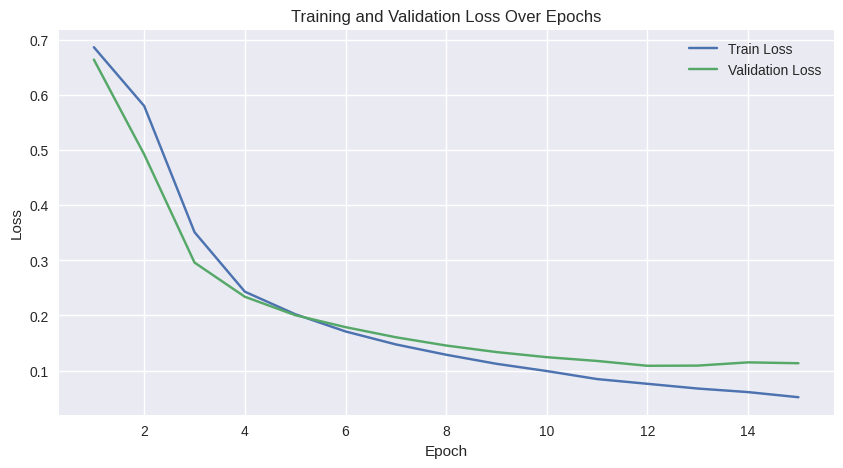

In [89]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, EPOCH_NUMBER + 1), train_losses, label='Train Loss')
plt.plot(range(1, EPOCH_NUMBER + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()

In [92]:
# Write your code here for Model Training here
dl_loss_value = 0.052

#define the iteration

#create the training loop


### 5. Model Evaluation
Evaluate your model's performance on the test data using the grading scheme defined above.

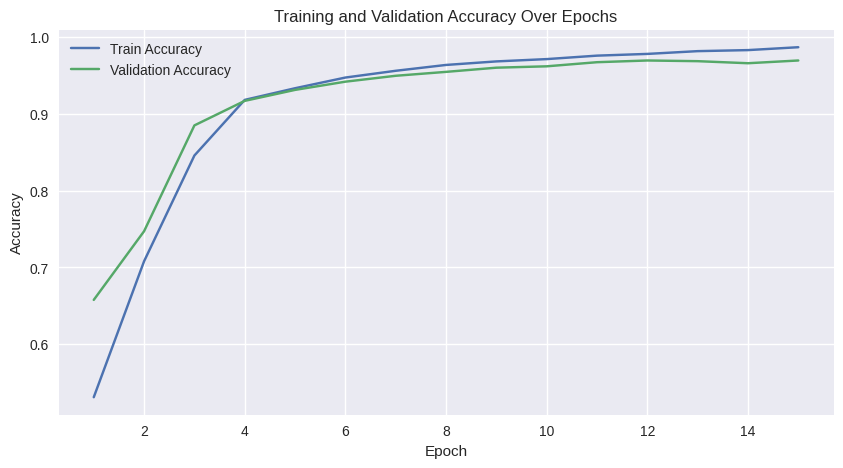

In [90]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, EPOCH_NUMBER + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, EPOCH_NUMBER + 1), valid_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()

In [93]:
# Write your code here for Model Evaluation here
dl_accuracy = 0.9869

#define the iteration

#create the training loop


In [95]:
torch.save(model.state_dict(), '/content/drive/MyDrive/best_model.pth')

## Submission

Once you are satisfied with the performance of your model, then you run the code block below to submit your project.


In [94]:
# Submit Method

# Do not change the code below
question_id = "01_dl_project_accuracy"
submit(student_id, name, assignment_id, str(dl_accuracy), question_id, drive_link)
question_id = "02_dl_project_loss_value"
submit(student_id, name, assignment_id, str(dl_loss_value), question_id, drive_link)

'Assignment successfully submitted'

## FIN